In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

datos_graficar = ['PTS', 'FGA', 'FGM', 'MIN','FP','TOV', 'RANK', 'AGE', '3P%']



años = [2024,2023,2022,2021,2020,2019,2018,2017,2016]

def filtrar_datos(df_data,año_contrato,año_estadisticas):
    df_nuevo = df_data.copy()
    df_correlacion = df_nuevo.loc[:,'Contrato {}'.format(año_contrato)]
    df_año_estadisticas = df_nuevo.filter(like= str(año_estadisticas))
    df_año_estadisticas.drop(columns = 'Contrato {}'.format(año_estadisticas), inplace = True)
    df_año_estadisticas.drop(columns = 'Equipo {}'.format(año_estadisticas), inplace = True)
    df_correlacion = pd.concat([df_correlacion, df_año_estadisticas],axis = 1)
    return df_correlacion

def graficar_todos_dispersion(dato_interes, df):
  contrato = df.filter(like= 'Contrato').drop(columns='Contrato 2016')
  contrato = contrato.stack(dropna=False).reset_index(drop=True)

  estadistica = df.filter(like= dato_interes).drop(columns='{} 2024'.format(dato_interes))
  estadistica = estadistica.stack(dropna=False).reset_index(drop=True)

  # Gráfico de dispersión entre estadísticas y contrato
  plt.scatter(estadistica, contrato, s = 20, c = 'red')
  plt.title('{} vs. contrato'.format(dato_interes))
  plt.xlabel("{}".format(dato_interes))
  plt.ylabel("Valor contrato")

  # Agregar una cuadrícula
  plt.grid(True)

  # Mostrar la gráfica
  plt.show()

def seleccionar_todos_dispersion(dato_interes, df):
  contrato = df.filter(like= 'Contrato').drop(columns='Contrato 2016')
  contrato = contrato.stack(dropna=False).reset_index(drop=True)

  estadistica = df.filter(like= dato_interes).drop(columns='{} 2024'.format(dato_interes))

  estadistica = estadistica.stack(dropna=False).reset_index(drop=True)

  return estadistica, contrato
def graficar_individual_linea(datos_interes, df, player):
  fig, axes = plt.subplots(3, 3, figsize=(12, 8))
  df_player = df.loc[df['Nombre'] == player]
  y = df_player.filter(like= 'Contrato').drop(columns = 'Contrato 2016').stack().reset_index(drop=True)
  for i in range(len(datos_interes)):
    #x, y = seleccionar_todos_dispersion(datos_graficar[i], df_contratos_diferentes)
    x = df_player.filter(like= datos_interes[i]).drop(columns = '{} 2024'.format(datos_interes[i])).stack().reset_index(drop=True)
    print(x)
    print(y)
    if i < 3:
      axes[0,i].plot(x, y)
      axes[0,i].set_title('{} vs. contrato'.format(datos_graficar[i]))
    elif i >= 3 and i < 6:
      axes[1,i - 3].plot(x, y)
      axes[1,i - 3].set_title('{} vs. contrato'.format(datos_graficar[i]))
    else:
      axes[2,i - 6].plot(x, y)
      axes[2,i - 6].set_title('{} vs. contrato'.format(datos_graficar[i]))
  plt.tight_layout()
  plt.show()

def graficar_individual_scatter(datos_interes, df, player):
  fig, axes = plt.subplots(3, 3, figsize=(12, 8))
  df_player = df.loc[df['Nombre'] == player]
  y = df_player.filter(like= 'Contrato').drop(columns = 'Contrato 2016').stack().reset_index(drop=True)
  for i in range(len(datos_interes)):
    #x, y = seleccionar_todos_dispersion(datos_graficar[i], df_contratos_diferentes)
    x = df_player.filter(like= datos_interes[i]).drop(columns = '{} 2024'.format(datos_interes[i])).stack().reset_index(drop=True)
    print(x)
    print(y)
    if i < 3:
      axes[0,i].scatter(x, y)
      axes[0,i].set_title('{} vs. contrato'.format(datos_graficar[i]))
    elif i >= 3 and i < 6:
      axes[1,i - 3].scatter(x, y)
      axes[1,i - 3].set_title('{} vs. contrato'.format(datos_graficar[i]))
    else:
      axes[2,i - 6].scatter(x, y)
      axes[2,i - 6].set_title('{} vs. contrato'.format(datos_graficar[i]))
  plt.tight_layout()
  plt.show()




df = pd.read_csv('datos_todas_las_jugadoras_posibles.csv')
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace('\t', ' ')


Se observa como ha variado el promedio de PTS a traves de los años

<Axes: >

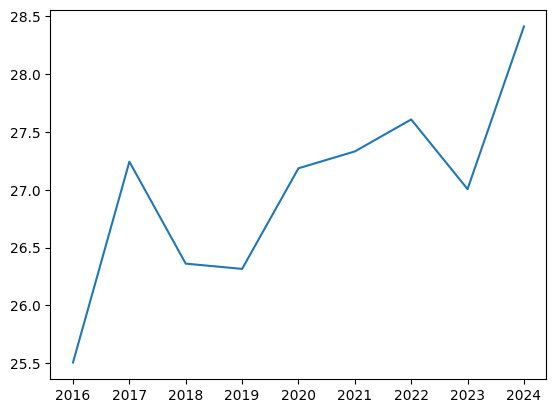

In [ ]:
df_3PP = df.filter(like = '3P%')
df_3PP_per_year = df_3PP.describe().loc['mean']
df_3PP_per_year.index = pd.RangeIndex(start=2024, stop=2015, step=-1)
df_3PP_per_year.plot(kind = 'line')

Se observa la jugadora Sue Bird

In [ ]:
df.loc[df['Nombre'] == 'SUE BIRD']

,Nombre,Contrato 2024,Equipo 2024,Contrato 2023,Equipo 2023,Contrato 2022,Equipo 2022,Contrato 2021,Equipo 2021,Contrato 2020,...,REB 2016,AST 2016,TOV 2016,STL 2016,BLK 2016,PF 2016,FP 2016,DD2 2016,TD3 2016,+/- 2016
195,SUE BIRD,NaN,NaN,NaN,NaN,72141.0,SEA,221450.0,SEA,215000.0,...,2.9,5.8,2.5,1.0,0.2,1.4,25.9,1.0,0.0,3.0


In [5]:
df_sue = df.loc[df['Nombre'] == 'SUE BIRD']
df_sue_contratos = df_sue.filter(like= 'Contrato').drop(columns = 'Contrato 2016').stack().reset_index(drop=True)
df_sue_pts = df_sue.filter(like= 'PTS').drop(columns = 'PTS 2024').stack().reset_index(drop=True)

años = [2022,2021,2020,2019,2018,2017]
df_sue_contratos.index = años
df_sue_pts.index = años
print(df_sue_pts)


2022     7.8
2021    10.0
2020     9.8
2019    10.1
2018    10.6
2017    12.8
dtype: float64


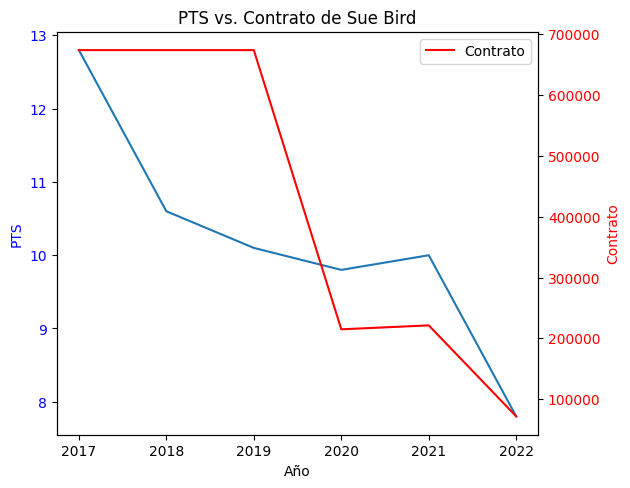

In [6]:
fig, ax1 = plt.subplots()  # Crea la figura y el primer eje
ax1.plot(df_sue_pts, label='PTS')  # Grafica la primera curva en el primer eje
ax1.set_xlabel('Año')  # Etiqueta del eje x
ax1.set_ylabel('PTS', color='blue')  # Etiqueta del eje y primario (color azul)
ax1.tick_params('y', labelcolor='blue') # Color de las etiqeutas del eje y primario

ax2 = ax1.twinx()  # Crea un segundo eje (comparte el mismo eje)
ax2.plot(df_sue_contratos, color='red', label='Contrato')  # Grafica la segunda curva en el segundo eje (color rojo)
ax2.set_ylabel('Contrato', color='red')  # Etiqueta del eje y secundario (color rojo)
ax2.tick_params('y', labelcolor='red')  # Color de las etiquetas del eje y secundario

fig.tight_layout()  # Ajusta la gráfica
plt.title('PTS vs. Contrato de Sue Bird') # Añade un título
plt.legend() # Añade una leyenda
plt.show()  # Muestra la gráfica

Ahora se procede a ver todos los datos pero filtrados los contratos dobles

In [10]:
import numpy as np

#Se limpia los datos para solo tener los contratos que varian

nuevo_dataset = {'RANK' : [], 'AGE': [], 'GP': [], 'W': [], 'L': [], 'MIN': [], 'PTS': [], 'FGM': [], 'FGA': [], 'FG%': [], '3PM': [], '3PA': [], '3P%': [],
                  'FTM': [], 'FTA': [], 'FT%': [], 'OREB': [], 'DREB': [], 'REB': [], 'AST': [], 'TOV': [], 'STL': [], 'BLK': [], 'PF': [], 'FP': [], 'DD2': [],'TD3': [], '+/-': []}

df_contratos_diferentes = df.copy()
df_contratos = df.filter(like='Contrato')
df_contratos_colums = df_contratos.columns

for player in df['Nombre']:
    for i in range(len(años) - 2):
      if df.loc[df['Nombre'] == player, df_contratos_colums[i]].iloc[0] == df.loc[df['Nombre'] == player, df_contratos_colums[i + 1]].iloc[0]:
        df_contratos_diferentes.loc[df['Nombre'] == player, df_contratos_colums[i]] = np.nan
        for dato in nuevo_dataset.keys():
          df_contratos_diferentes.loc[df['Nombre'] == player, '{} {}'.format(dato,años[i+1])] = np.nan

df_contratos_diferentes.to_csv('datos_contratos_diferentes.csv')

0     7.8
1    10.0
2     9.8
3    12.8
dtype: float64
0     72141.0
1    221450.0
2    215000.0
3    673000.0
dtype: float64
0     6.8
1     8.2
2     7.5
3    10.5
dtype: float64
0     72141.0
1    221450.0
2    215000.0
3    673000.0
dtype: float64
0    2.7
1    3.5
2    3.7
3    4.7
dtype: float64
0     72141.0
1    221450.0
2    215000.0
3    673000.0
dtype: float64
0    26.4
1    27.7
2    23.4
3    31.6
dtype: float64
0     72141.0
1    221450.0
2    215000.0
3    673000.0
dtype: float64
0    20.2
1    22.2
2    20.5
3    25.9
dtype: float64
0     72141.0
1    221450.0
2    215000.0
3    673000.0
dtype: float64
0    1.9
1    1.6
2    1.6
3    2.5
dtype: float64
0     72141.0
1    221450.0
2    215000.0
3    673000.0
dtype: float64
0    68.0
1    48.0
2    51.0
3    24.0
dtype: float64
0     72141.0
1    221450.0
2    215000.0
3    673000.0
dtype: float64
0    42.0
1    41.0
2    40.0
3    36.0
dtype: float64
0     72141.0
1    221450.0
2    215000.0
3    673000.0
dtype: float64


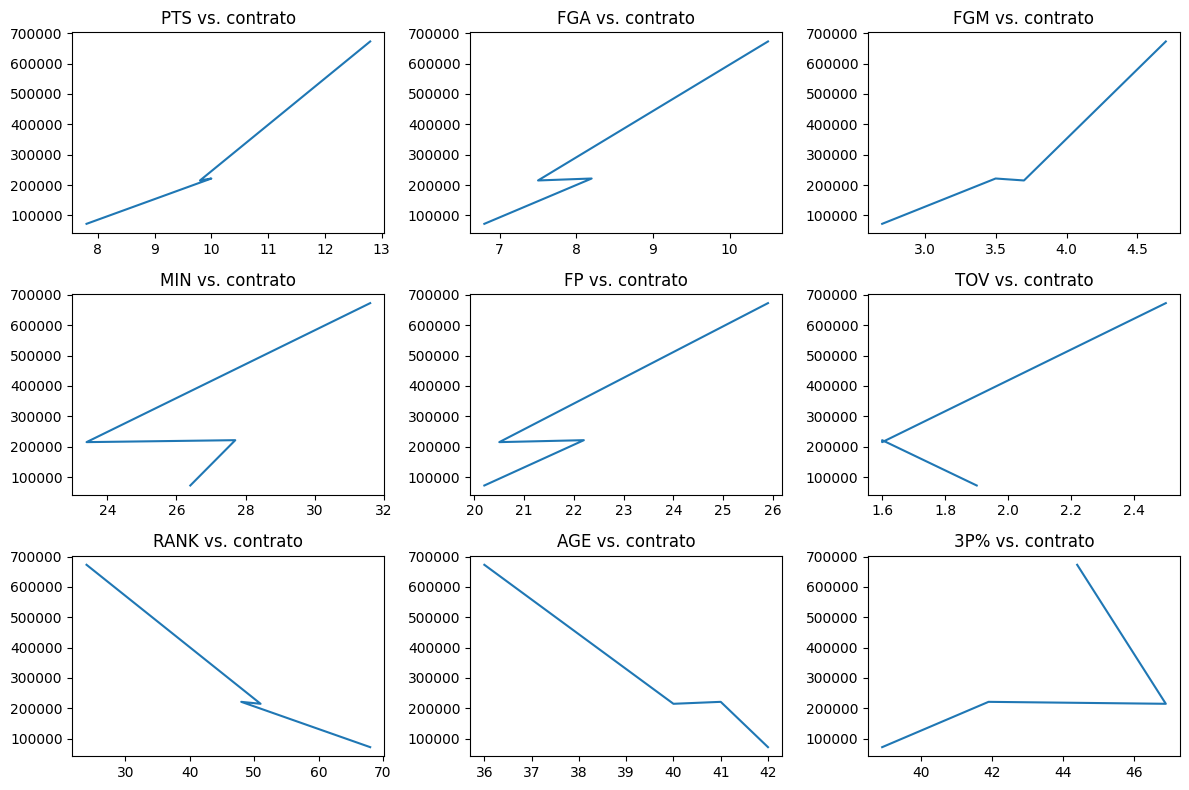

In [11]:
graficar_individual_linea(datos_graficar,df_contratos_diferentes,'SUE BIRD')